**Programmer:** python_scripts (Abhijith Warrier)

**PYTHON SCRIPT TO **_FIT A POLYNOMIAL REGRESSION MODEL USING `PolynomialFeatures` + `LinearRegression` IN A PIPELINE._** 🐍🧪📈**

This script generates a synthetic non-linear dataset, builds a **Pipeline (PolynomialFeatures → LinearRegression)**, evaluates metrics (MAE/MSE/R²), and visualizes the fitted curve vs. the data.

### 📦 Import Libraries
We’ll use NumPy for data generation, scikit-learn for modeling/metrics, and matplotlib for visualization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### 🧪 Create a Synthetic Non-Linear Dataset
We’ll simulate data from a quadratic relationship with noise:
\[
y = 0.5x^2 - 2x + 3 + \epsilon
\]

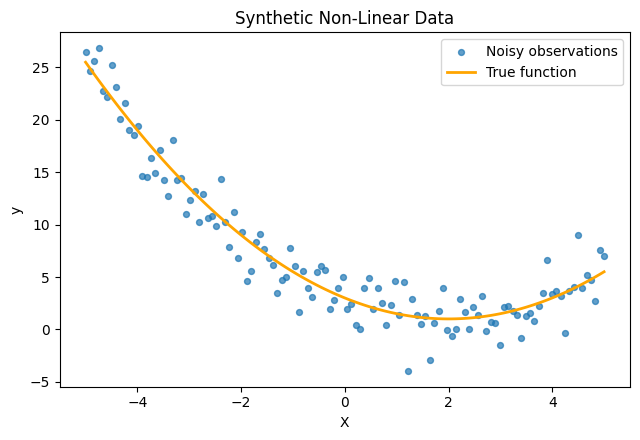

In [2]:
rng = np.random.RandomState(42)

# Feature (single input) and target
X = np.linspace(-5, 5, 120).reshape(-1, 1)
true_y = 0.5 * X ** 2 - 2 * X + 3
y = (true_y + rng.normal(scale=2.0, size=X.shape)).ravel()  # add Gaussian noise

# Quick visual check of raw data
plt.figure(figsize=(6.5, 4.5))
plt.scatter(X, y, s=18, alpha=0.7, label="Noisy observations")
plt.plot(X, true_y, lw=2, label="True function", color="orange")
plt.title("Synthetic Non-Linear Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.tight_layout()
plt.show()

### ✂️ Train/Test Split
Keep a hold-out set to estimate generalization performance.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

### ⚙️ Build the Polynomial Regression Pipeline
Use `PolynomialFeatures(degree=d)` to expand inputs, then fit a linear model on the expanded features.

In [4]:
degree = 2  # try 2 for quadratic; experiment with 3 or 4 as well

poly_reg = Pipeline(steps=[
    ("poly", PolynomialFeatures(degree=degree, include_bias=False)),
    ("linreg", LinearRegression())
])

### 🚀 Train the Model
Fit the pipeline on the training set; it will expand features then fit Linear Regression.

In [5]:
poly_reg.fit(X_train, y_train)

,steps,"[('poly', ...), ('linreg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,2
,interaction_only,False
,include_bias,False
,order,'C'
,fit_intercept,True
,copy_X,True
,tol,1e-06


### 🔎 Evaluate on Test Set (MAE, MSE, R²)
Compute standard regression metrics to assess fit quality.

In [6]:
y_pred = poly_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Degree: {degree}")
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"R² : {r2:.3f}")

Degree: 2
MAE: 1.447
MSE: 3.171
R² : 0.938


### 📈 Visualize the Fitted Curve
Sort X across the full range, predict smoothly, and overlay with the noisy scatter.

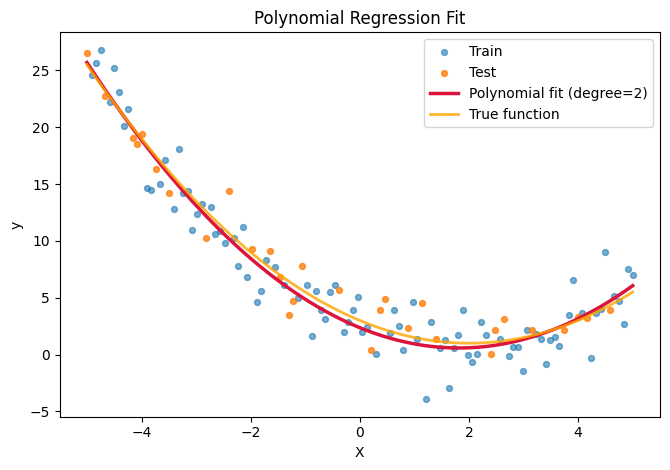

In [7]:
# Sort for a smooth fitted curve
X_plot = np.linspace(X.min(), X.max(), 400).reshape(-1, 1)
y_fit = poly_reg.predict(X_plot)

plt.figure(figsize=(6.8, 4.8))
plt.scatter(X_train, y_train, s=18, alpha=0.6, label="Train")
plt.scatter(X_test, y_test, s=18, alpha=0.8, label="Test")
plt.plot(X_plot, y_fit, lw=2.5, color="crimson", label=f"Polynomial fit (degree={degree})")
plt.plot(X, true_y, lw=2, color="orange", alpha=0.8, label="True function")
plt.title("Polynomial Regression Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.tight_layout()
plt.show()

### 📝 Notes & Tips
- **Bias–Variance tradeoff:** Higher degree can reduce bias but may **overfit** (watch test R²).
- Try degrees **1–5** and pick the best via **cross-validation** (`GridSearchCV` over `poly__degree`).
- For multi-feature data, polynomial expansion grows quickly; consider `degree` and **regularization** (`Ridge`, `Lasso`).
- Keep `include_bias=False` since `LinearRegression` has an intercept by default.